In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent.resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project root added: {PROJECT_ROOT}")

Project root added: C:\Users\h\Desktop\Week 7\rag-complaint-chatbot


In [2]:
from src.preprocessor import CFPBDataProcessor

processor = CFPBDataProcessor()

In [8]:
processor = CFPBDataProcessor()
processor.download_dataset()      # Skip if already done
processor.load_data()       # Chunked + filtered load
processor.perform_eda()
processor.filter_and_clean()
processor.save()

Raw dataset already exists: C:\Users\h\Desktop\Week 7\rag-complaint-chatbot\data\raw\complaints.csv
Starting memory-safe chunked loading...
Chunk 1 processed | Filtered so far: 205
Chunk 2 processed | Filtered so far: 492
Chunk 3 processed | Filtered so far: 758
Chunk 4 processed | Filtered so far: 1,117
Chunk 5 processed | Filtered so far: 1,702
Chunk 6 processed | Filtered so far: 2,677
Chunk 7 processed | Filtered so far: 4,028
Chunk 8 processed | Filtered so far: 6,560
Chunk 9 processed | Filtered so far: 11,744
Chunk 10 processed | Filtered so far: 14,736
Chunk 11 processed | Filtered so far: 16,285
Chunk 12 processed | Filtered so far: 18,356
Chunk 13 processed | Filtered so far: 20,409
Chunk 14 processed | Filtered so far: 21,788
Chunk 15 processed | Filtered so far: 23,902
Chunk 16 processed | Filtered so far: 25,326
Chunk 17 processed | Filtered so far: 26,927
Chunk 18 processed | Filtered so far: 29,597
Chunk 19 processed | Filtered so far: 33,405
Chunk 20 processed | Filtere

Total complaints in filtered dataset: 372,873

Product distribution:


Product
Checking or savings account                           140319
Credit card or prepaid card                           108667
Money transfer, virtual currency, or money service     97188
Payday loan, title loan, or personal loan              17238
Consumer Loan                                           9461
Name: count, dtype: int64

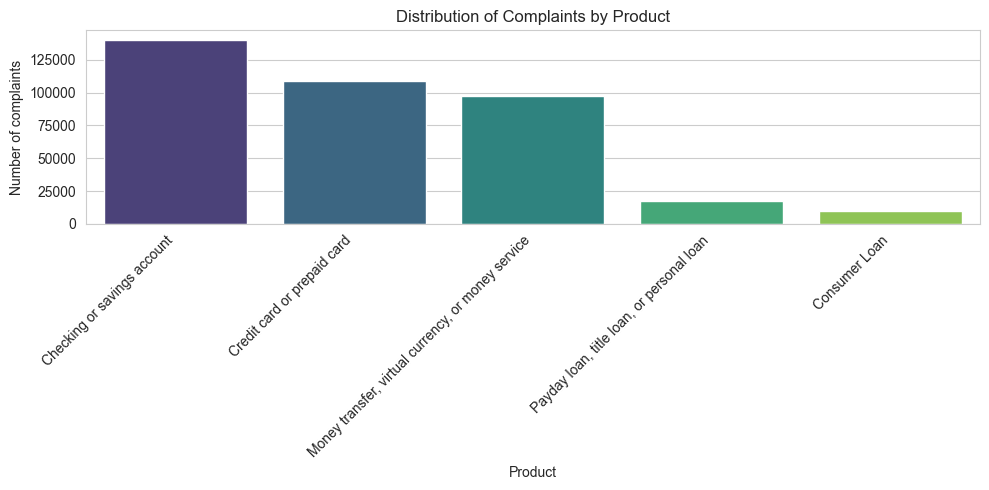


Complaints with narrative: 372,873
Complaints without narrative: 0

Word count statistics:


count    372873.000000
mean        206.226528
std         227.957767
min           1.000000
25%          86.000000
50%         135.000000
75%         253.000000
max        6014.000000
Name: word_count, dtype: float64

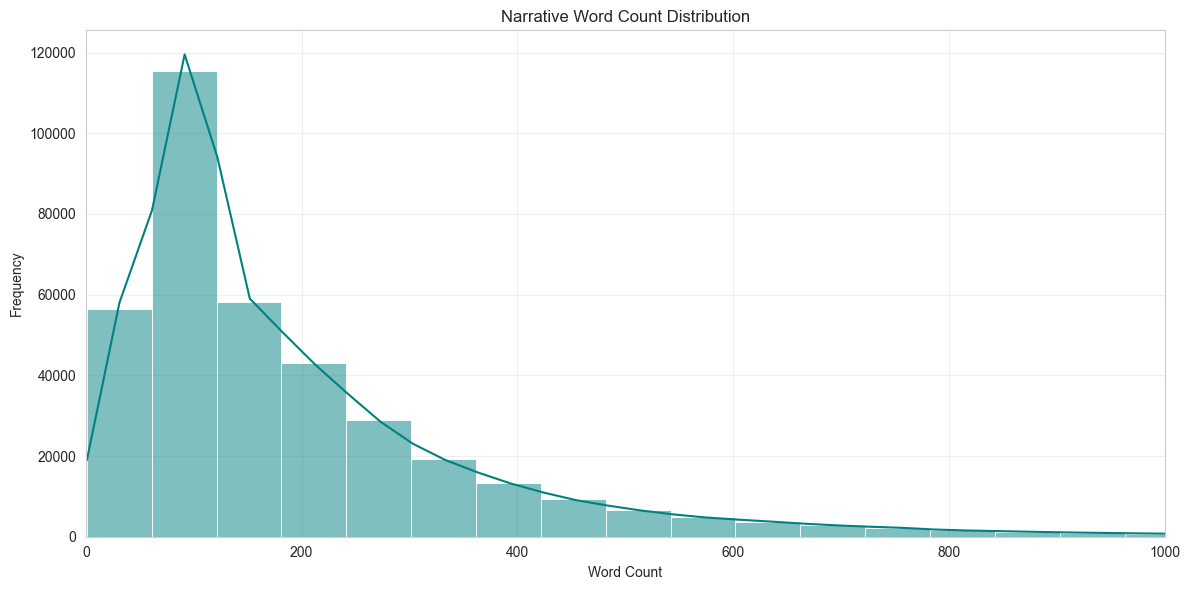

Word count plot saved at C:\Users\h\Desktop\Week 7\rag-complaint-chatbot\notebooks\narrative_word_count_distribution.png


In [9]:
# %% [markdown]
# # Task 1: EDA on CFPB Complaint Dataset
# This notebook performs exploratory data analysis (EDA) on the filtered complaint dataset.

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.settings import FILTERED_CSV, WORD_COUNT_PLOT, RELEVANT_CFPB_PRODUCTS

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# %%
# Load the filtered dataset
df = pd.read_csv(FILTERED_CSV)

# Overview
total_complaints = len(df)
print(f"Total complaints in filtered dataset: {total_complaints:,}")

# %%
# Product distribution
product_counts = df['Product'].value_counts()
print("\nProduct distribution:")
display(product_counts)

# Bar plot of product distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of complaints")
plt.title("Distribution of Complaints by Product")
plt.tight_layout()
plt.show()

# %%
# Complaints with vs without narrative
with_narrative = df['Consumer complaint narrative'].notna().sum()
without_narrative = len(df) - with_narrative
print(f"\nComplaints with narrative: {with_narrative:,}")
print(f"Complaints without narrative: {without_narrative:,}")

# %%
# Word count of narratives
df['word_count'] = df['Consumer complaint narrative'].str.split().str.len()
print("\nWord count statistics:")
display(df['word_count'].describe())

# Histogram of word counts
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=100, kde=True, color="teal")
plt.title("Narrative Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 1000)  # focus on typical range
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(WORD_COUNT_PLOT)
plt.show()
print(f"Word count plot saved at {WORD_COUNT_PLOT}")
